<a href="https://colab.research.google.com/github/mirandaaochi/mirandaaochi.github.io/blob/main/Spotify_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis with Python: Most Streamed Spotify Songs for 2023



The goals of this project are:
* To investigate artist and song cross-platform performance to reveal most popular artists and songs of 2023.
* To analyze cross-platform performances and audio feature patterns to understand trends and preferences in Grammy nominations.

## Dataset Selection

Dataset: [Top Spotify Songs 2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)

According to Kaggle, this dataset "contains a comprehensive list of the most famous songs of 2023 as listed on Spotify."

Following the 66th Grammy Awards, I thought this dataset would be interesting to explore as it contains insights into each song's attributes, popularity, and presence on various music platforms to see if there are any patterns.

[66th Annual Grammy Awards and Nominees](https://www.grammy.com/awards/66th-annual-grammy-awards-2023 )

## Import Libraries and Dataset

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

print('Libraries Imported')

Libraries Imported


In [2]:
#DOWNLOADING DATASET IF NOT PRESENT
from google.colab import files
uploaded = files.upload()

Saving spotify-2023.csv to spotify-2023.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/spotify-2023.csv', encoding='ISO-8859-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


This dataset contains 953 songs organized by 24 columns.

Let's view the list of columns in the data frame.

In [5]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

As explained on Kaggle:
*   **track_name**: Name of the song
*   **artist(s)_name**: Name of the artist(s) of the song
*   **artist_count**: Number of artists contributing to the song
*   **released_year**: Year when the song was released
*   **released_month**: Month when the song was released
*   **released_day**: Day of the month when the song was released
*   **in_spotify_playlists**: Number of Spotify playlists the song is included in
*   **in_spotify_charts**: Presence and rank of the song on Spotify charts
*   **streams**: Total number of streams on Spotify
*   **in_apple_playlists**: Number of Apple Music playlists the song is included in
*   **in_apple_charts**: Presence and rank of the song on Apple Music charts
*   **in_deezer_playlists**: Number of Deezer playlists the song is included in
*   **in_deezer_charts**: Presence and rank of the song on Deezer charts
*   **in_shazam_charts**: Presence and rank of the song on Shazam charts
*   **bpm**: Beats per minute, a measure of song tempo
*   **key**: Key of the song
*   **mode**: Mode of the song (major or minor)
*   **danceability_%**: Percentage indicating how suitable the song is for dancing
*   **valence_%**: Positivity of the song's musical content
*   **energy_%**: Perceived energy level of the song
*   **acousticness_%**: Amount of acoustic sound in the song
*   **instrumentalness_%**: Amount of instrumental content in the song
*   **liveness_%**: Presence of live performance elements
*   **speechiness_%**: Amount of spoken words in the song

**Spotify Audio Features: Explained**

For every track on their platform, Spotify provides data for thirteen Audio Features. The Spotify Web API developer guide defines them as follows:
* Danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
* Valence: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* Energy: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
* Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.
* Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
* Speechiness: This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
* Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.
* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

## Data Preparation and Cleaning

1. Explore the number of rows & columns, ranges of values etc.
2. Handle missing, incorrect and invalid data
3. Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [6]:
df.shape

(953, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Looking at the data types, we see that all of our columns are either objects (strings) or integers (numbers).

Let's take a closer look into which columns are which, starting with our columns with objects.

In [8]:
df.select_dtypes(include='object').head()

,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703,45,826,B,Major
1,LALA,Myke Towers,133716286,58,382,C#,Major
2,vampire,Olivia Rodrigo,140003974,91,949,F,Major
3,Cruel Summer,Taylor Swift,800840817,125,548,A,Major
4,WHERE SHE GOES,Bad Bunny,303236322,87,425,A,Minor


It's odd that the number of *streams* isn't an integer. Same with the values in *in_deezer_playlists* and *in_shazam_charts* because the values for *in_Spotify_playlists*, *in_Spotify_charts*, *in_apple_playlists*, *in_apple_charts*, and *in_deezer_charts* are.

Let's convert these columns to become integers.

When we try to convert *streams* into an integer, we're struck with the following error:

**Unable to parse string "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3" at position 574**

Further inspection shows that the song at position 574 doesn't have a listed number of streams. Looking on Spotify, we see that there are currently 229,229,073 plays for 'Love Grows (Where My Rosemary Goes).' Since we want the total number of streams for this column, we can replace the value.

In [9]:
df.loc[574]

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
in_deezer_playlists                                                    54
in_deezer_charts                                                        0
in_shazam_charts                      

In [10]:
df[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


Since there is only 1 row with this specific issue, we can replace as follows.

In [11]:
new_df = df
new_df = new_df.replace('BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3', '229229073')
new_df.loc[574]

track_name              Love Grows (Where My Rosemary Goes)
artist(s)_name                            Edison Lighthouse
artist_count                                              1
released_year                                          1970
released_month                                            1
released_day                                              1
in_spotify_playlists                                   2877
in_spotify_charts                                         0
streams                                           229229073
in_apple_playlists                                       16
in_apple_charts                                           0
in_deezer_playlists                                      54
in_deezer_charts                                          0
in_shazam_charts                                          0
bpm                                                     110
key                                                       A
mode                                    

In [12]:
new_df['streams'] = pd.to_numeric(new_df['streams'], downcast="integer")

Similarly, when we try to convert *in_deezer_playlists* into an integer, we're struck with the following error:

**Unable to parse string "2,445" at position 48**

In this case, we need to replace the value without the comma. We'll do this for the whole column in case there are other values like this.

In [13]:
new_df['in_deezer_playlists'] = new_df['in_deezer_playlists'].str.replace(',', '')
new_df['in_deezer_playlists'] = pd.to_numeric(new_df['in_deezer_playlists'], downcast="integer")

Finally, when we try to convert *in_shazam_charts*, we're given the following error:

**Unable to parse string "1,021" at position 12**

We'll want to again replace the string with a number without the comma and perform this on the whole column.

In [14]:
new_df['in_shazam_charts'] = new_df['in_shazam_charts'].str.replace(',', '')
new_df['in_shazam_charts'] = pd.to_numeric(new_df['in_shazam_charts'], downcast="integer")

Next, let's check for any null values.

In [15]:
new_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

This shows us that there are missing values for songs in the Shazam charts column and the key column.

Although the missing values in the Shazam charts can be attributed to the idea that a song simply didn't become a charting hit, the missing key values may be something to take note of for the future.

Let's change the Shazam chart null values to 0.

In [16]:
new_df['in_shazam_charts'] = new_df['in_shazam_charts'].fillna(0)
new_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Now, we can view some basic statistics about the numeric columns. Again, these are all of the columns except for *track_name*, *artist(s)_name*, *key*, and *mode*, which are all strings.

In [17]:
new_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.138385e+08,67.812172,51.908709,385.187828,2.666317,56.847849,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.666343e+08,86.441493,50.630241,1130.535561,6.035599,157.441749,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.417210e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.902286e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,164.000000,2.000000,33.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Descriptive Statistics by Column:
*   **artist_count**:
    * The number of artists contributing to a song ranged from **1** to **8**.
    * The average was about 1.556, which we can round to **2** since we can't split a person in half.
*   **released_year**:
    * The year that a song was released ranged from **1930** to **2023**, with the average being **2018**.
*   **released_month**:
    * The month when a song was released ranged from **January** (1) to **December** (12). The average was **June** (6).
    * *In the future, it may be interesting to explore how many songs were actually released in June.*
*   **released_day**:
    * The day of the month when a song was released ranged from **1** to **31**, with the average being about 13.931, which we can round to **14**.
    * *In the future, it may be interesting to explore the most popular days to release a song and the day of the week they correspond to.*
*   **in_spotify_playlists**:
    * The number of Spotify playlists a song is included in ranged from **31** and **52898**.
    * The average was about 5200.125, which rounds to **5200**.
*   **in_spotify_charts**:
    * The range for presence and rank of a song on Spotify charts was **0** to **147**.
    * The average was **12**.
*   **streams**:
    * The total number of streams for a song on Spotify ranged from **2,762** to **3,703,895,000**.
    * The average number of streams is **513,838,500**.
*   **in_apple_playlists**:
    * The number of Apple Music playlists a song is included in ranged from **0** to **672**.
    * The average was about 67.812, which we can round to **68**.
*   **in_apple_charts**:
    * The range for presence and rank of a song on Apple Music charts was **0** to **275**.
    * The average was 51.909, which we can round to **52**.
*   **in_deezer_playlists**:
    * The number of Deezer playlists a song is included in ranged from **0** to **12367**.
    * The average was about 385.188, which we can round to **385**.
*   **in_deezer_charts**:
    * The range for presence and rank of a song on Deezer charts was **0** to **58**.
    * The average was about 2.666, which we can round to **3**.
*   **in_shazam_charts**:
    * The range for presence and rank of a song on Shazam charts was **0** to **1451**.
    * The average was about 56.848, which we can round to **57**.
*   **bpm**:
    * The range for beats per minute in a song was **65** to **206**.
    * The average bpm was about 122.540, which we can round to **123**.
*   **danceability_%**:
    * The percentage of how suitable a song is for dancing ranged from **23%** to **96%**.
    * The average danceability percentage was about 66.970%, which rounds to **67%**.
*   **valence_%**:
    * The percentage of positivity for a song's musical content ranged from **4%** to **97%**.
    * The average valence percentage was about 51.431%, which rounds to **51%**.
*   **energy_%**:
    * The perceived energy level of a song ranged from **9%** to **97%**.
    * The average energy level was about 64.279%, which rounds to **64%**.
*   **acousticness_%**:
    * The amount of acoustic sound in a song ranged from **0%** to **97%**.
    * The average acoustic percentage was about 27.058, which rounds to **27%**.
*   **instrumentalness_%**:
    * The amount of instrumental content in a song ranged from **0%** to **91%**.
    * The average instrumentalness percentage was about 1.581, which rounds to **2%**.
*   **liveness_%**:
    * The percentage of presence of live performance elements in a song ranged from **3%** to **97%**.
    * The average liveness percentage was about 18.213, which rounds to **18%**.
*   **speechiness_%**:
    * The amount of spoken words in a song ranged from **2%** to **64%**.
    * The average percentage of speechiness was about 10.131, which rounds to **10%**.

# Exploratory Analysis and Visualization

Before we start our analysis to answer our Grammy questions, it would be helpful to understand some other aspects of our data.

Let's start by examining the 10 most popular songs for each chart variable.

In [18]:
new_df[['track_name', 'artist(s)_name', 'in_spotify_charts']].sort_values('in_spotify_charts', ascending=False).head(10)

,track_name,artist(s)_name,in_spotify_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",147
14,As It Was,Harry Styles,130
12,Flowers,Miley Cyrus,115
2,vampire,Olivia Rodrigo,113
22,I Wanna Be Yours,Arctic Monkeys,110
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,104
29,Dance The Night (From Barbie The Album),Dua Lipa,101
3,Cruel Summer,Taylor Swift,100
13,Daylight,David Kushner,98
5,Sprinter,"Dave, Central Cee",91


In [19]:
new_df[['track_name', 'artist(s)_name', 'in_apple_charts']].sort_values('in_apple_charts', ascending=False).head(10)

,track_name,artist(s)_name,in_apple_charts
872,Last Last,Burna Boy,275
888,Mary On A Cross,Ghost,266
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",263
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,227
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",222
12,Flowers,Miley Cyrus,215
5,Sprinter,"Dave, Central Cee",213
16,Cupid - Twin Ver.,Fifty Fifty,212
8,fukumean,Gunna,210
3,Cruel Summer,Taylor Swift,207


In [20]:
new_df[['track_name', 'artist(s)_name', 'in_deezer_charts']].sort_values('in_deezer_charts', ascending=False).head(10)

,track_name,artist(s)_name,in_deezer_charts
12,Flowers,Miley Cyrus,58
14,As It Was,Harry Styles,46
42,I'm Good (Blue),"Bebe Rexha, David Guetta",45
26,Calm Down (with Selena Gomez),"Rï¿½ï¿½ma, Selena G",38
29,Dance The Night (From Barbie The Album),Dua Lipa,38
106,Cold Heart - PNAU Remix,"Dua Lipa, Elton John, Pnau",37
46,I Ain't Worried,OneRepublic,37
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",31
133,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira, Bizarrap",29
71,Heat Waves,Glass Animals,28


We notice here that Selena Gomez is listed as Selena G for "Calm Down." In addition, there are special characters in Rema's name. Let's fix this.

In [21]:
new_df = new_df.replace('Rï¿½ï¿½ma, Selena G', 'Rema, Selena Gomez')
new_df[new_df['artist(s)_name'].str.contains('Selena')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
26,Calm Down (with Selena Gomez),"Rema, Selena Gomez",2,2022,3,25,7112,77,899183384,202,...,107,B,Major,80,82,80,43,0,14,4
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3


In [22]:
new_df[['track_name', 'artist(s)_name', 'in_shazam_charts']].sort_values('in_shazam_charts', ascending=False).head(10)

,track_name,artist(s)_name,in_shazam_charts
88,Makeba,Jain,1451.0
13,Daylight,David Kushner,1281.0
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1173.0
89,MONTAGEM - FR PUNK,"Ayparia, unxbected",1170.0
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",1133.0
24,Popular (with Playboi Carti & Madonna) - The I...,"The Weeknd, Madonna, Playboi Carti",1093.0
12,Flowers,Miley Cyrus,1021.0
8,fukumean,Gunna,953.0
653,The Next Episode,"Dr. Dre, Snoop Dogg",953.0
2,vampire,Olivia Rodrigo,949.0


There's variations within the chart variable for each platform. This could be because of the audience that uses each platform. However, there are also some similarities.

Next, let's examine the artists with the most songs in our dataset. It's worth noting that if a song has multiple artists, that collaboration is considered 1 "artist" within our database. An example of this is Karol G.

In [23]:
new_df[new_df['artist(s)_name'] == 'Karol G']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
52,AMARGURA,Karol G,1,2023,2,24,1133,39,153372011,14,...,107,F#,Minor,92,55,70,18,0,15,7
58,S91,Karol G,1,2023,7,14,525,41,16011326,34,...,128,NaN,Minor,86,42,72,59,0,9,19
259,MIENTRAS ME CURO DEL CORA,Karol G,1,2023,2,24,1020,35,206399629,15,...,80,NaN,Major,52,57,48,86,0,15,39
271,PROVENZA,Karol G,1,2022,4,21,6587,34,885093467,114,...,111,C#,Major,87,53,52,66,1,11,5


In [24]:
new_df[new_df['artist(s)_name'].str.contains('Karol G')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
34,TQG,"Karol G, Shakira",2,2023,2,23,4284,49,618990393,115,...,180,E,Minor,72,61,63,67,0,9,28
52,AMARGURA,Karol G,1,2023,2,24,1133,39,153372011,14,...,107,F#,Minor,92,55,70,18,0,15,7
58,S91,Karol G,1,2023,7,14,525,41,16011326,34,...,128,NaN,Minor,86,42,72,59,0,9,19
259,MIENTRAS ME CURO DEL CORA,Karol G,1,2023,2,24,1020,35,206399629,15,...,80,NaN,Major,52,57,48,86,0,15,39
261,X SI VOLVEMOS,"Karol G, Romeo Santos",2,2023,2,2,2127,33,266624541,45,...,178,C#,Minor,79,58,78,34,0,11,25
271,PROVENZA,Karol G,1,2022,4,21,6587,34,885093467,114,...,111,C#,Major,87,53,52,66,1,11,5
321,CAIRO,"Karol G, Ovy On The Drums",2,2022,11,13,2418,26,294352144,52,...,115,F,Minor,95,43,69,47,0,9,31
351,PERO Tï¿,"Karol G, Quevedo",2,2023,2,23,387,11,93438910,11,...,140,F#,Major,86,68,79,39,0,11,29
499,GATï¿½ï¿½,"Maldy, Karol G",2,2022,8,25,3328,13,322336177,39,...,93,B,Minor,63,34,86,26,0,21,39
648,MAMIII,"Karol G, Becky G",2,2022,2,10,6809,28,716591492,151,...,94,E,Minor,84,90,70,9,0,14,8


To solve this, we'll need to separate the artists into separate rows before we find and plot the top 20.

In [25]:
df_exp = new_df
df_exp['artist(s)_name'] = df_exp['artist(s)_name'].str.split(', ')
df_exploded = df_exp.explode('artist(s)_name')
df_exploded.rename(columns={"artist(s)_name":"artist_name"},inplace=True)
df_exploded.head()

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
0,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15


<ipython-input-26-0269c01c6150>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=songs.index, y=songs['artist_count'], data=songs, palette='magma')


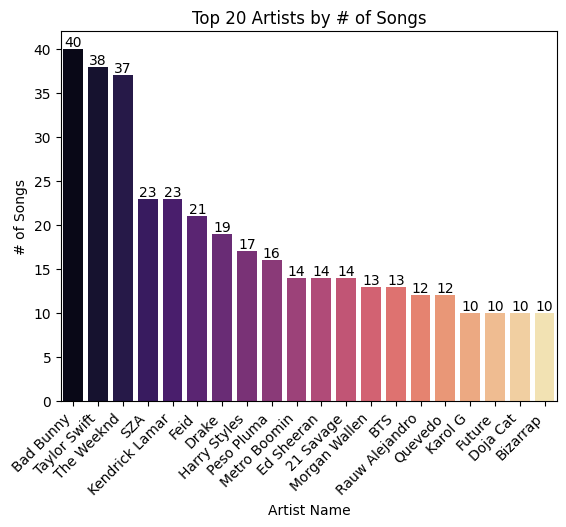

In [26]:
songs = df_exploded.groupby('artist_name').count().sort_values('artist_count', ascending=False).head(20)
ax = sns.barplot(x=songs.index, y=songs['artist_count'], data=songs, palette='magma')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 20 Artists by # of Songs')
plt.xlabel('Artist Name')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('# of Songs');

Which of these songs were released in 2023? Which were NOT released in 2023?

In [27]:
most_songs = ['Taylor Swift', 'The Weeknd', 'Bad Bunny', 'Kendrick Lamar', 'SZA', 'Drake', 'Harry Styles', 'Feid', 'Bad Bunny', '21 Savage', 'Metro Boomin', 'Ed Sheeran', 'Morgan Wallen', 'Peso Pluma', 'BTS', 'Karol G', 'Eminem', 'Labrinth', 'Rauw Alejandro', 'Olivia Rodrigo']
most_song_artists = df_exploded[df_exploded['artist_name'].isin(most_songs)]

# https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9#:~:text=Group%20by%20and%20value_counts,of%20activities%20each%20person%20did.
most_song_years = most_song_artists.groupby('released_year')['artist_name'].value_counts().unstack().fillna(0)

# https://stackoverflow.com/questions/71611140/highlighting-values-based-on-groupby-in-pandas
# https://www.geeksforgeeks.org/set-pandas-dataframe-background-color-and-font-color-in-python/
cm = sns.light_palette("green", as_cmap=True)
most_song_years.style.background_gradient(cmap=cm).set_precision(2)

<ipython-input-27-ca2460a6998b>:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  most_song_years.style.background_gradient(cmap=cm).set_precision(2)


artist_name,21 Savage,BTS,Bad Bunny,Drake,Ed Sheeran,Eminem,Feid,Harry Styles,Karol G,Kendrick Lamar,Labrinth,Metro Boomin,Morgan Wallen,Olivia Rodrigo,Peso Pluma,Rauw Alejandro,SZA,Taylor Swift,The Weeknd
released_year,,,,,,,,,,,,,,,,,,,
1996,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2002,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2004,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2012,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2014,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00
2015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [28]:
in_22 = df_exploded[(df_exploded['artist_name'].isin(most_songs)) & (df_exploded['released_year'] == 2022)]['track_name'].count()
in_22

185

In [29]:
in_23 = df_exploded[(df_exploded['artist_name'].isin(most_songs)) & (df_exploded['released_year'] == 2023)]['track_name'].count()
in_23

67

For the 20 artists with the most songs in the dataset, only 57 songs were actually released in 2023. In fact, 2022 saw the majority of song releases, totalling 185 songs for these artists.

Bad Bunny had the greatest number of "famous" songs with 24 in 2022. Peso Pluma  had the greatest number in 2023 with 12.

How many artists are in the dataset?

In [30]:
df_exploded['artist_name'].nunique()

698

Which songs had the most streams?

In [31]:
top_songs = new_df.sort_values(by='streams', ascending = False)
top_songs.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,[The Weeknd],1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,[Ed Sheeran],1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,[Lewis Capaldi],1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,[Tones and I],1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"[Post Malone, Swae Lee]",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"[Drake, WizKid, Kyla]",3,2016,4,4,43257,24,2713922350,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"[Justin Bieber, The Kid Laroi]",2,2021,7,9,17050,36,2665343922,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,[Imagine Dragons],1,2017,1,31,18986,23,2594040133,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"[The Chainsmokers, Halsey]",2,2016,5,31,28032,0,2591224264,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"[The Weeknd, Daft Punk]",2,2016,9,21,29536,79,2565529693,281,...,186,G,Major,68,49,59,16,0,13,28


Which artists had the most streams?

In [32]:
top_streams = df_exploded.groupby('artist_name')['streams'].sum().sort_values(ascending=False).head(20)
top_streams = pd.DataFrame({'artist_name': top_streams.index, 'streams': top_streams.values})
top_streams

,artist_name,streams
0,The Weeknd,23929760757
1,Bad Bunny,23813527270
2,Ed Sheeran,15316587718
3,Taylor Swift,14630378183
4,Harry Styles,11608645649
5,Eminem,10193727260
6,Dua Lipa,9980020481
7,Justin Bieber,8243081039
8,Drake,8043031261
9,BTS,7780428159


<ipython-input-33-53a42410b9ed>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_1 = sns.barplot(x='artist_name', y='streams', data=top_streams, palette='magma')


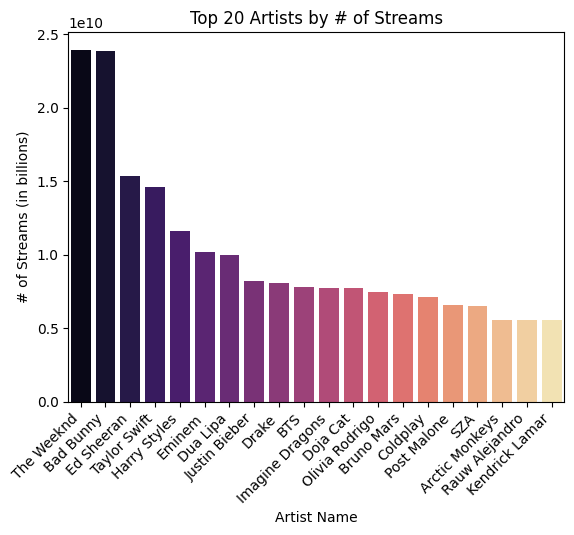

In [33]:
ax_1 = sns.barplot(x='artist_name', y='streams', data=top_streams, palette='magma')
plt.title('Top 20 Artists by # of Streams')
plt.xlabel('Artist Name')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('# of Streams (in billions)');

Whose songs were in the most playlists for each platform?

In [34]:
playlist_df = df_exploded[['artist_name', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].groupby('artist_name').sum()
playlist_df['in_spotify_playlists'].sort_values(ascending=False).head(10)

artist_name
The Weeknd        233079
Eminem            155091
Ed Sheeran        142877
Taylor Swift      137766
Bad Bunny         137562
Dua Lipa          119490
Kendrick Lamar    113963
Harry Styles      110026
Coldplay          105218
Dr. Dre           104608
Name: in_spotify_playlists, dtype: int64

In [35]:
playlist_df['in_apple_playlists'].sort_values(ascending=False).head(10)

artist_name
The Weeknd       3023
Dua Lipa         2118
Bad Bunny        2016
Taylor Swift     1899
Ed Sheeran       1857
Harry Styles     1741
Drake            1370
Justin Bieber    1369
Calvin Harris    1232
Doja Cat         1151
Name: in_apple_playlists, dtype: int64

In [36]:
playlist_df['in_deezer_playlists'].sort_values(ascending=False).head(10)

artist_name
Eminem         24524
Ed Sheeran     17833
Coldplay       15419
Dr. Dre        15408
Linkin Park    14149
Nirvana        13564
The Weeknd     12474
Snoop Dogg     12075
Daft Punk      10660
Adele           9299
Name: in_deezer_playlists, dtype: int16

Now, let's examine the audio features. We'll begin by taking a look at their relationships to each other.

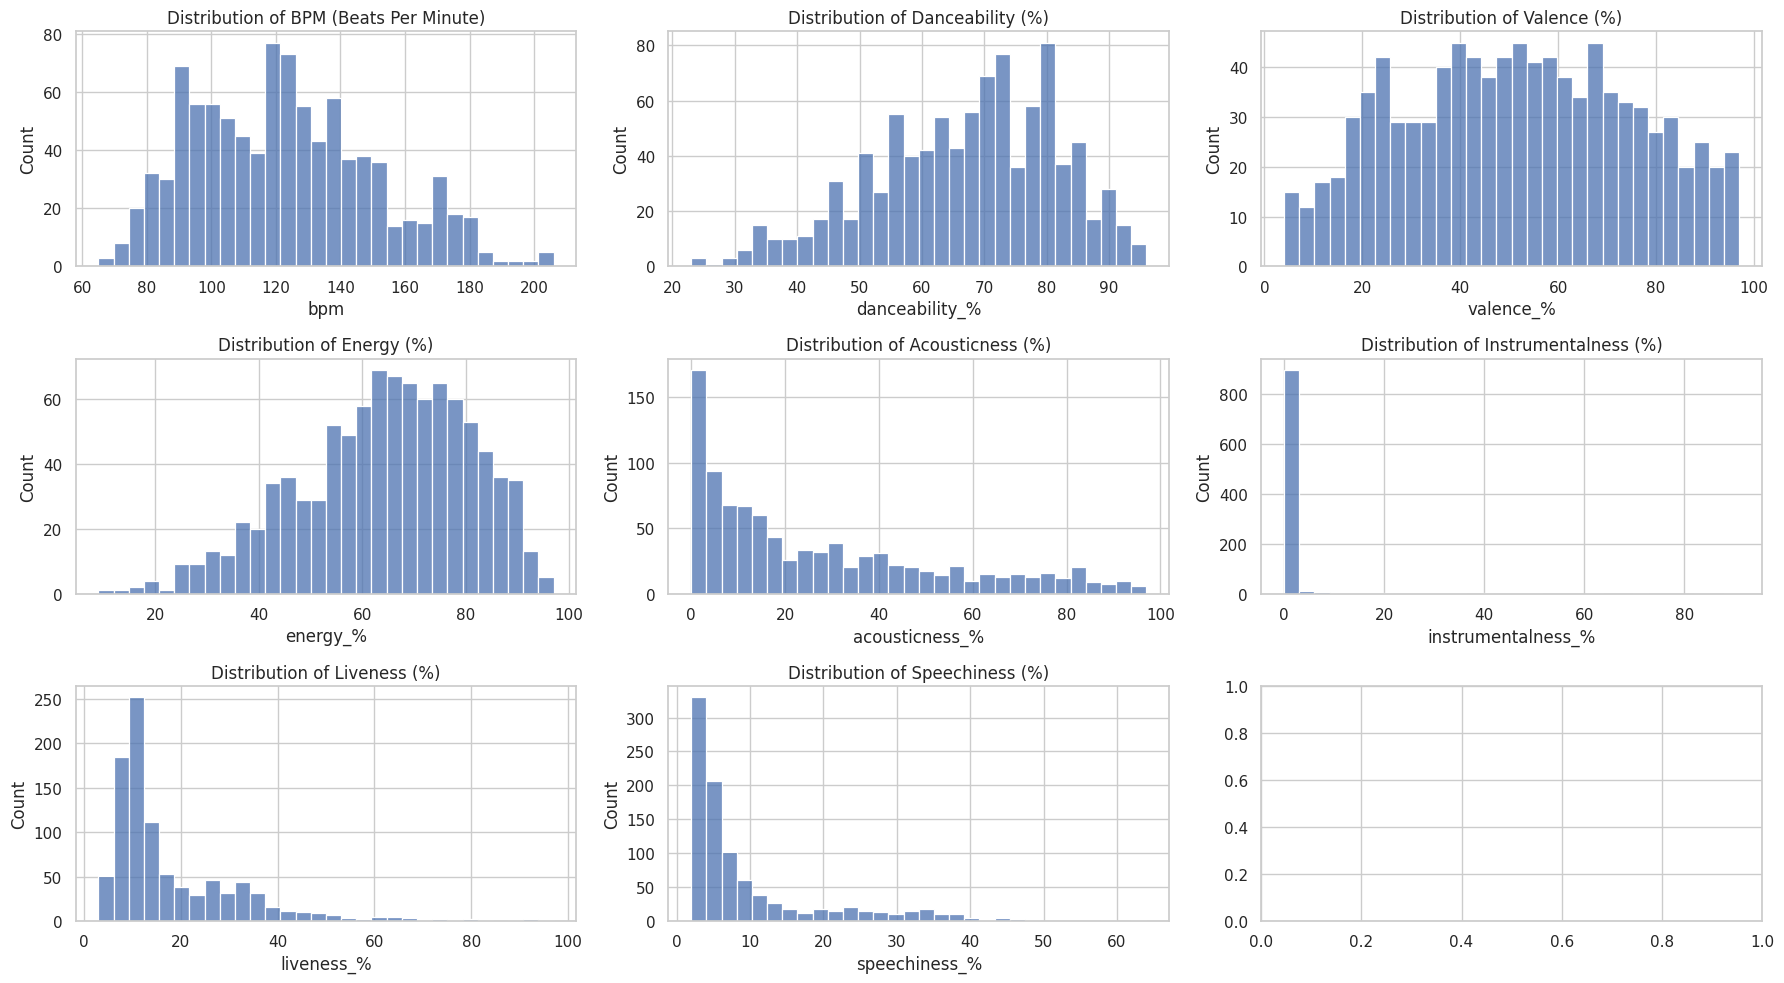

In [45]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

# BPM (Beats Per Minute)
sns.histplot(new_df['bpm'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of BPM (Beats Per Minute)')

# Danceability
sns.histplot(new_df['danceability_%'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Danceability (%)')

# Valence
sns.histplot(new_df['valence_%'], bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Valence (%)')

# Energy
sns.histplot(new_df['energy_%'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Energy (%)')

# Acousticness
sns.histplot(new_df['acousticness_%'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Acousticness (%)')

# Instrumentalness
sns.histplot(new_df['instrumentalness_%'], bins=30, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Instrumentalness (%)')

# Liveness
sns.histplot(new_df['liveness_%'], bins=30, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Liveness (%)')

# Speechiness
sns.histplot(new_df['speechiness_%'], bins=30, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Speechiness (%)')

plt.tight_layout()
plt.show()

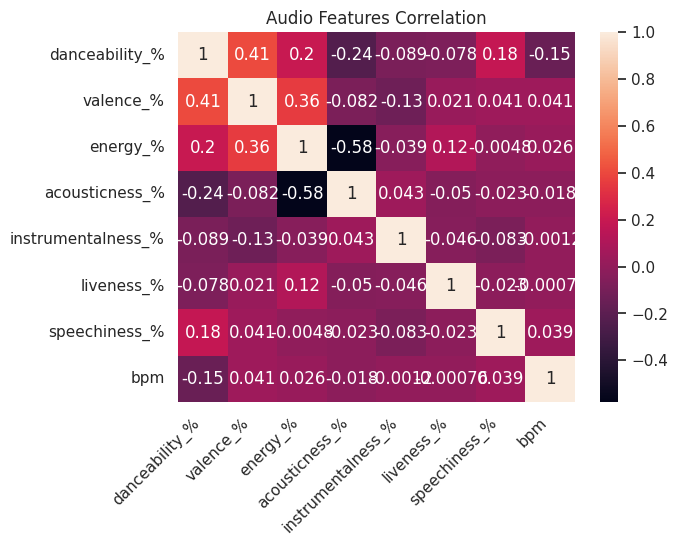

In [38]:
feature_columns = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%", 'bpm']
feature_matrix = new_df[feature_columns].corr()
sns.heatmap(feature_matrix, annot = True)
plt.title("Audio Features Correlation")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

How are these features related to the number of streams a song may get?

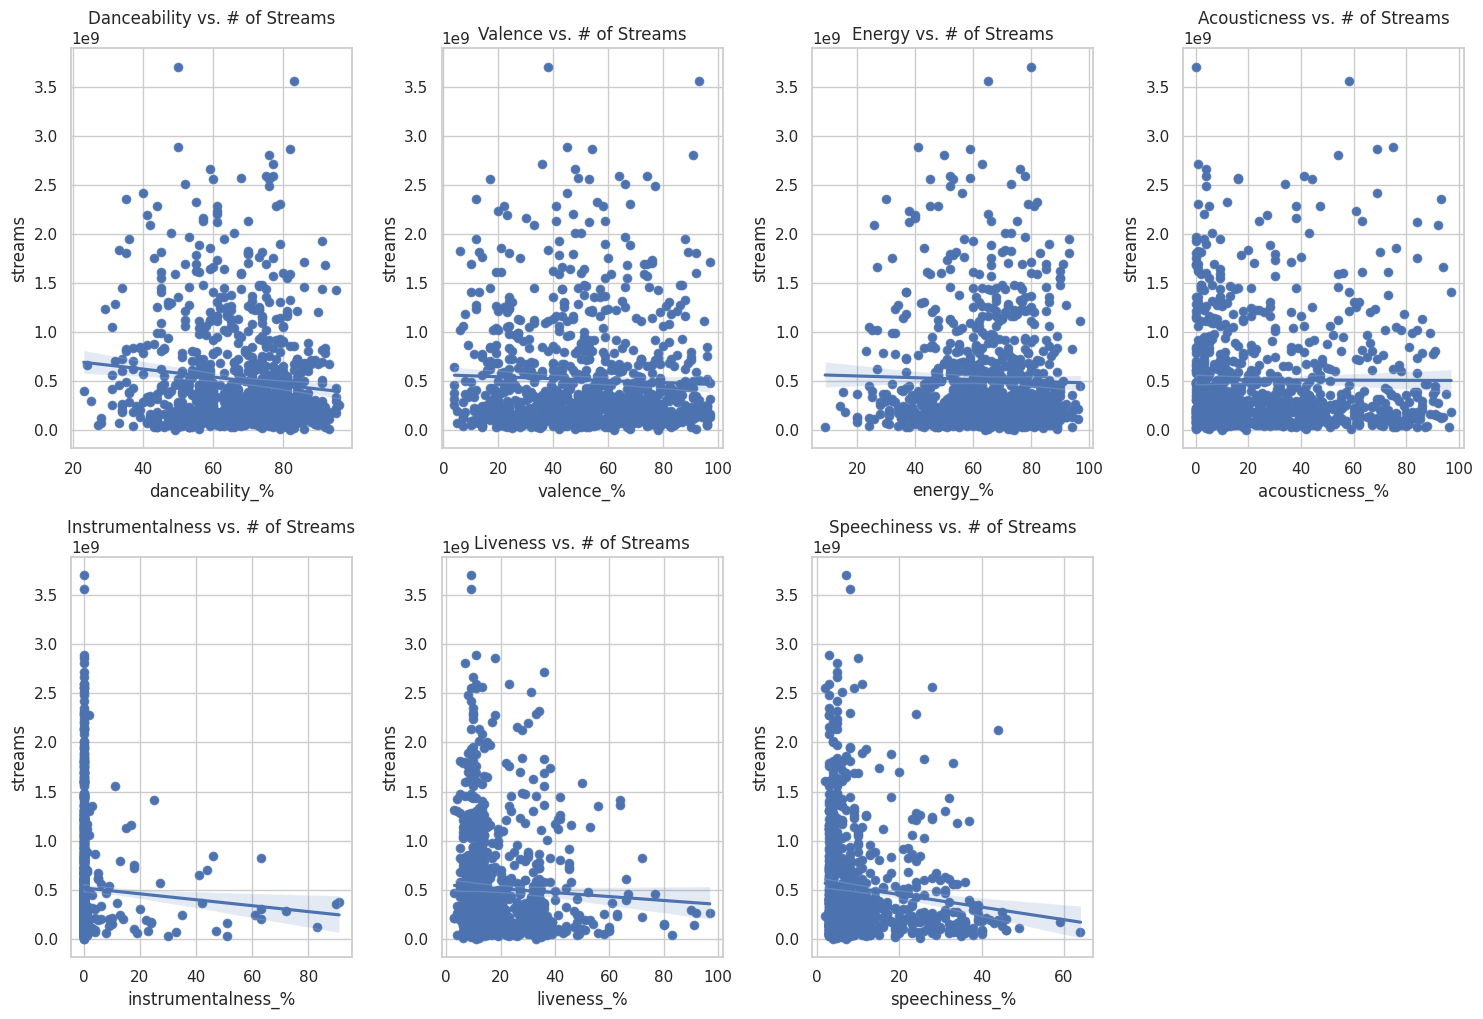

In [39]:
plt.figure(figsize=(15,20))
for i, feature in enumerate(feature_columns[:len(feature_columns)-1], start=1):
    plt.subplot(4,4, i)
    plt.title(feature.replace("_%","").capitalize() + " vs. # of Streams")
    plt.ylabel('Streams (in billions)')
    plt.xlabel(feature.replace("_%","").capitalize())
    sns.scatterplot(x=new_df[feature], y=new_df['streams'])
    sns.regplot(x=new_df[feature], y=new_df['streams'])
plt.tight_layout()

What's the most popular BPM used by artists?

<ipython-input-40-75badbd82cda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_3 = sns.barplot(x='bpm', y='count', data=bpm_count, palette='magma')


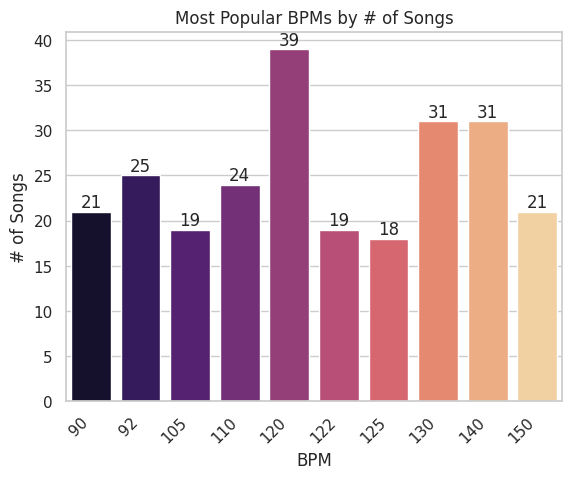

In [40]:
bpm_count = new_df['bpm'].value_counts(ascending=False).head(10)
bpm_count = pd.DataFrame({'bpm': bpm_count.index, 'count': bpm_count.values})
ax_3 = sns.barplot(x='bpm', y='count', data=bpm_count, palette='magma')
for container in ax_3.containers:
    ax_3.bar_label(container)
plt.title('Most Popular BPMs by # of Songs')
plt.xlabel('BPM')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('# of Songs');

120 BPM is the most popularly used, followed by 130 or 140 BPM.

What BPM is streamed the most?

<ipython-input-41-aac05b7fc776>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bpm', y='streams', data=bpm_streams, palette='magma')


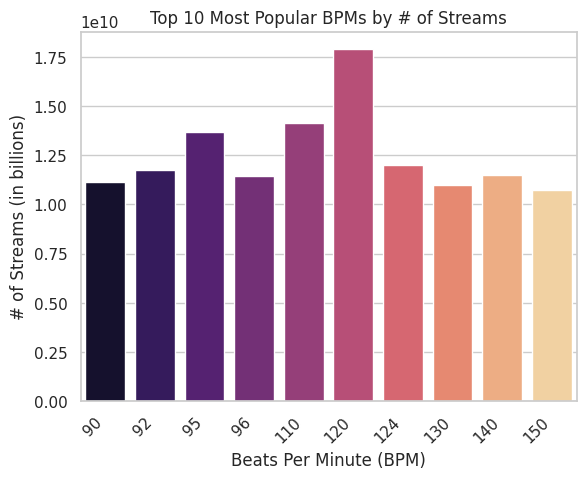

In [41]:
bpm_streams = new_df.groupby('bpm')['streams'].sum().sort_values(ascending=False).head(10)
bpm_streams = pd.DataFrame({'bpm': bpm_streams.index, 'streams': bpm_streams.values})

sns.barplot(x='bpm', y='streams', data=bpm_streams, palette='magma')
plt.title('Top 10 Most Popular BPMs by # of Streams')
plt.xlabel('Beats Per Minute (BPM)')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('# of Streams (in billions)');

In [42]:
new_df[new_df['bpm'] == 120].sort_values(by='streams', ascending=False).head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
187,Circles,[Post Malone],1,2019,8,30,19664,16,2132335812,391,...,120,NaN,Major,70,59,75,24,0,9,4
623,All of Me,[John Legend],1,2013,8,1,27221,0,2086124197,308,...,120,G#,Major,42,33,26,92,0,13,3
180,Night Changes,[One Direction],1,2014,11,17,7124,18,1131090940,60,...,120,G#,Major,67,40,52,86,0,12,4
390,Boy With Luv (feat. Halsey),"[Halsey, BTS]",2,2019,4,12,4260,0,1065580332,113,...,120,B,Minor,65,80,86,9,0,19,10
598,The Business,[Tiï¿½ï¿],1,2020,1,1,14311,0,1062345656,255,...,120,G#,Minor,80,24,62,41,2,11,23


Once again, we see that the most popular BPM is 120. Some of the top streamed tracks with a BPM of 120 include:
*   "Circles" by Post Malone
*   "All of Me" by John Legend
*   "Night Changes" by One Direction
*   "Boy with Luv" by BTS and Halsey
*   "The Business" by Tiësto




What's the most popular key?

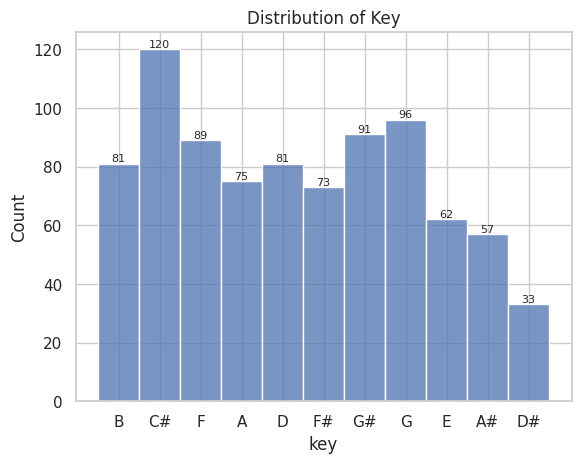

In [43]:
sns.set(style="whitegrid")
ax_4 = sns.histplot(new_df['key'])
plt.title('Distribution of Key')

labels = []
for p in ax_4.patches:
    h = p.get_height()
    labels.append(str(h) if h else '')

ax_4.bar_label(ax_4.containers[0], labels=labels, fontsize=8);

What's the more common mode?

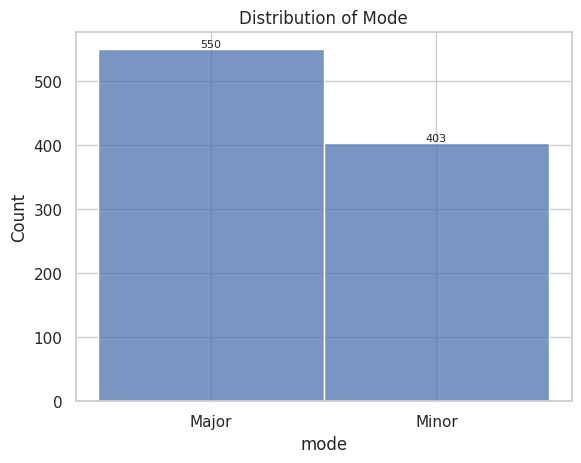

In [44]:
sns.set(style="whitegrid")
ax_5 = sns.histplot(new_df['mode'])
plt.title('Distribution of Mode')

labels = []
for p in ax_5.patches:
    h = p.get_height()
    labels.append(str(h) if h else '')

ax_5.bar_label(ax_5.containers[0], labels=labels, fontsize=8);

The major mode is more common than the minor.

## Grammy Analysis

The eligibility period for this cycle was October 1, 2022 – September 15, 2023.

In [47]:
grammys = df_exploded
date = pd.to_datetime(dict(year=grammys.released_year, month=grammys.released_month, day=grammys.released_day))
grammys['release_date'] = date
#October 1, 2022 – September 15, 2023
grammys = grammys[(grammys['release_date'] >= '2022-10-1') & (grammys['release_date'] <= '2023-9-15')]
grammys = grammys.drop(columns=['released_year', 'released_month', 'released_day'])
grammys.head()

,track_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,553,147,141381703,43,263,45,10,...,B,Major,80,89,83,31,0,8,4,2023-07-14
0,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,553,147,141381703,43,263,45,10,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,F,Major,51,32,53,17,0,31,6,2023-06-30
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


**Best Pop Solo Performance**

This category is specifically designed for singles or tracks, showcasing the skill and artistry of individual performers in the pop genre. The award is presented to the performing artist, highlighting their exceptional talent and contribution to the music industry.

Winner: "Flowers" by Miley Cyrus

Nominees:
* "Anti-Hero" by Taylor Swift
* "Vampire" by Olivia Rodrigo
* "What Was I Made For? [From The Motion Picture \"Barbie\"]" by Billie Eilish
* "Paint The Town Red" by Doja Cat

*Of those nominated for Best Pop Solo Performance, which song was the most popular?*

In [48]:
pop_solo = ['Flowers', 'Anti-Hero', 'vampire', 'What Was I Made For? [From The Motion Picture "Barbie"]', 'Paint the Town Red']
pop_solo_noms = grammys[grammys['track_name'].isin(pop_solo)].drop(columns=['artist_count', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'])
pop_solo_noms.sort_values(by='streams', ascending = False).style.highlight_max(subset=pop_solo_noms.columns[2:10])

,track_name,artist_name,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,release_date
12,Flowers,Miley Cyrus,12211,115,1316855716,300,215,745,58,1021.000000,2023-01-12 00:00:00
33,Anti-Hero,Taylor Swift,9082,56,999748277,242,142,165,9,310.000000,2022-10-21 00:00:00
2,vampire,Olivia Rodrigo,1397,113,140003974,94,207,91,14,949.000000,2023-06-30 00:00:00
17,"What Was I Made For? [From The Motion Picture ""Barbie""]",Billie Eilish,873,104,30546883,80,227,95,24,1173.000000,2023-07-13 00:00:00


"Paint the Town Red" is not contained within our dataset as the only Doja Cat songs contained in the main dataset are from 2019-2022. Of the other four performances, "Flowers" appears to be the most popular with the greatest number of streams and the most playlist adds across the different platforms. However, "What Was I Made For?" has the most chart numbers for Apple and Shazam while "Flowers" reigns for Spotify and Deezer.

In [49]:
# check for Doja Cat
df_exploded[df_exploded['artist_name'] == 'Doja Cat']

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
361,I Like You (A Happier Song) (with Doja Cat),Doja Cat,2,2022,6,3,5281,14,609293408,94,...,F,Major,74,43,69,12,0,12,7,2022-06-03
434,Woman,Doja Cat,1,2021,6,25,9424,0,1329090101,202,...,F,Minor,82,88,76,9,0,12,9,2021-06-25
516,Kiss Me More (feat. SZA),Doja Cat,2,2021,4,9,15867,0,1575467011,382,...,G#,Major,77,74,66,30,0,13,3,2021-04-09
518,Need To Know,Doja Cat,1,2021,6,11,6672,0,1042568408,125,...,C#,Major,66,19,61,30,0,9,7,2021-06-11
564,You Right,Doja Cat,2,2021,6,24,5073,0,672656250,83,...,G#,Major,83,44,62,2,0,8,6,2021-06-24
590,Get Into It (Yuh),Doja Cat,1,2021,6,25,4999,0,516784627,43,...,G#,Minor,91,79,66,32,0,9,16,2021-06-25
633,Streets,Doja Cat,1,2019,11,7,5728,0,865640097,85,...,B,Major,75,19,46,21,4,34,8,2019-11-07
714,Freaky Deaky,Doja Cat,2,2022,2,25,1729,0,153240879,26,...,D,Minor,80,24,65,2,0,9,4,2022-02-25
758,Ain't Shit,Doja Cat,1,2021,6,25,3436,0,499710590,32,...,D#,Major,86,62,49,51,0,35,21,2021-06-25
832,Vegas (From the Original Motion Picture Soundt...,Doja Cat,1,2022,5,6,4576,0,448500832,79,...,G#,Minor,80,74,60,8,0,14,26,2022-05-06


**Song of the Year**

Song Of The Year deals with the composition of a song and recognizes the songwriters who wrote the song.

Winner: "What Was I Made For? [From The Motion Picture \"Barbie\"]" by Billie Eilish O'Connell & Finneas O'Connell, songwriters (Billie Eilish)

Nominees:
* "vampire" by Daniel Nigro & Olivia Rodrigo, songwriters (Olivia Rodrigo)
* "Kill Bill" by Rob Bisel, Carter Lang & Solána Rowe, songwriters (SZA)
* "Flowers" by Miley Cyrus, Gregory Aldae Hein & Michael Pollack, songwriters (Miley Cyrus)
* "Dance The Night (From Barbie The Album)" by Caroline Ailin, Dua Lipa, Mark Ronson & Andrew Wyatt, songwriters (Dua Lipa)
* "Butterfly" by Jon Batiste & Dan Wilson, songwriters (Jon Batiste)
* "Anti-Hero" by Jack Antonoff & Taylor Swift, songwriters (Taylor Swift)
* "A&W" by Jack Antonoff, Lana Del Rey & Sam Dew, songwriters (Lana Del Rey)

*Of those nominated for Song the Year, what songwriting attributes stand out?*

In [50]:
song_of_year = ['What Was I Made For? [From The Motion Picture "Barbie"]', 'vampire', 'Kill Bill', 'Flowers', 'Dance The Night (From Barbie The Album)', 'Butterfly', 'Anti-Hero', 'A&W']
soy_noms = grammys[grammys['track_name'].isin(song_of_year)].drop(columns=['artist_count', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
                                                                           'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
                                                                           'danceability_%'])
soy_noms.sort_values(by='streams', ascending = False).style.highlight_max(props='background-color:green;', subset=soy_noms.columns[6:12]).highlight_min(props='background-color:red;', subset=soy_noms.columns[6:12])

,track_name,artist_name,streams,bpm,key,mode,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
12,Flowers,Miley Cyrus,1316855716,118,nan,Major,65,68,6,0,3,7,2023-01-12 00:00:00
15,Kill Bill,SZA,1163093654,89,G#,Major,43,73,5,17,16,4,2022-12-08 00:00:00
33,Anti-Hero,Taylor Swift,999748277,97,E,Major,51,63,12,0,19,5,2022-10-21 00:00:00
2,vampire,Olivia Rodrigo,140003974,138,F,Major,32,53,17,0,31,6,2023-06-30 00:00:00
29,Dance The Night (From Barbie The Album),Dua Lipa,127408954,110,B,Minor,78,85,2,0,33,5,2023-05-25 00:00:00
17,"What Was I Made For? [From The Motion Picture ""Barbie""]",Billie Eilish,30546883,78,nan,Major,14,9,96,0,10,3,2023-07-13 00:00:00


Since Song of the Year is based on song composition and songwriting, we're going to examine some of the related attributes that songwriters are likely to contribute to:
* valence
* energy
* acousticness
* instrumentalness
* speechiness

The winner, "What Was I Made For?" had the most acousticness and the least amount of valence, energy, instrumentalness, and speechiness. It also had the least amount of streams!

"Dance The Night" had the most valence, energy, and liveness, as well as the least amount of acousticness and instrumentalness. "Flowers" also had the least amount of istrumentalness and liveness, as wel as the most speechiness. It is worth noting that all of the tracks had an instrumentalness prediction of 0% except for "Kill Bill."

*In the future, it could be interesting to compare these attributes for different winners over the years.*

**Best New Artist**

Winner: Victoria Monét

Nominees:
* Jelly Roll
* The War and Treaty
* Noah Kahan
* Coco Jones
* Ice Spice
* Fred again..
* Gracie Abrams


*Of those nominated for Best New Artist, who was the most popular among the charts?*

In [51]:
new_artists = ["Victoria Monét", "Jelly Roll", "The War and Treaty", "Noah Kahan", "Coco Jones", "Ice Spice", "Fred again..", "Gracie Abrams"]
best_new_artists = grammys[grammys['artist_name'].isin(new_artists)]
best_new_artists

,track_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
44,Barbie World (with Aqua) [From Barbie The Album],Ice Spice,3,1117,80,65156199,82,145,65,16,...,NaN,Major,77,75,58,52,0,23,25,2023-06-23
61,Boy's a liar Pt. 2,Ice Spice,2,5184,41,156338624,154,84,102,14,...,F,Major,70,86,81,25,0,25,5,2023-02-03
218,Karma (feat. Ice Spice),Ice Spice,2,588,0,46142772,23,21,31,0,...,G#,Major,62,7,62,6,0,58,6,2023-05-26
272,Princess Diana (with Nicki Minaj),Ice Spice,2,1444,4,104992946,0,0,0,0,...,A,Major,90,74,68,14,0,10,19,2023-04-14


Of all of those nominated for Best New Artist, this dataset only contains songs from Ice Spice. Therefore, based on this dataset, Ice Spice had the most streams. However, we cannot rely on this conclusion as there may be other songs with more that were not included in this dataset.

**Record of the Year**

Record Of The Year deals with a specific recording of a song and recognizes the artists, producers and engineers who contribute to that recording.

Winner: "Flowers" by Miley Cyrus

Nominees:
* "Worship" by Jon Batiste
* "Anti-Hero" by Taylor Swift
* "vampire" by Olivia Rodrigo
* "On My Mama" by Victoria Monét
* "Not Strong Enough" by boygenius
* "What Was I Made For? [From The Motion Picture \"Barbie\"]" by Billie Eilish
* "Kill Bill" by SZA


*Of those nominated for Record of the Year, which song had the most streams? What attributes stand out about each song?*

In [65]:
roy_noms = ["Flowers", "Worship", "Anti-Hero", "vampire", "On My Mama", "Not Strong Enough", 'What Was I Made For? [From The Motion Picture "Barbie"]', "Kill Bill"]
record_of_the_year_noms = grammys[grammys['track_name'].isin(roy_noms)]
roy_popularity = record_of_the_year_noms.drop(columns=['artist_count', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']).sort_values(by='streams', ascending = False)
roy_popularity.style.highlight_max(subset=roy_popularity.columns[2:10])

,track_name,artist_name,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,release_date
12,Flowers,Miley Cyrus,12211,115,1316855716,300,215,745,58,1021.000000,2023-01-12 00:00:00
15,Kill Bill,SZA,8109,77,1163093654,183,162,161,12,187.000000,2022-12-08 00:00:00
33,Anti-Hero,Taylor Swift,9082,56,999748277,242,142,165,9,310.000000,2022-10-21 00:00:00
2,vampire,Olivia Rodrigo,1397,113,140003974,94,207,91,14,949.000000,2023-06-30 00:00:00
17,"What Was I Made For? [From The Motion Picture ""Barbie""]",Billie Eilish,873,104,30546883,80,227,95,24,1173.000000,2023-07-13 00:00:00


Between the songs nominated for Record of the Year, only 4 of those songs are included in our dataset. However, "Flowers" has the most streams. It also had the most chart appearances and was added to the most playlists.

In [66]:
features = ['track_name', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
roy_feats = record_of_the_year_noms[features]
roy_feats.style.highlight_max(props='background-color:green;', subset=roy_feats.columns[4:]).highlight_min(props='background-color:red;', subset=roy_feats.columns[4:])

,track_name,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
2,vampire,138,F,Major,51,32,53,17,0,31,6
12,Flowers,118,nan,Major,71,65,68,6,0,3,7
15,Kill Bill,89,G#,Major,64,43,73,5,17,16,4
17,"What Was I Made For? [From The Motion Picture ""Barbie""]",78,nan,Major,44,14,9,96,0,10,3
33,Anti-Hero,97,E,Major,64,51,63,12,0,19,5


"vampire" has the fastest BPM and the highest liveness percentage.

"Flowers" has the highest danceability, valence, and speechiness but the lowest liveness.

"Kill Bill" has the highest energy and instrumentalness but the lowest acousticness.

"What Was I Made For?" has the slowest BPM and the highest acousticness. It also has the lowest danceability, valence, energy, and speechiness.

"Anti-Hero" is tied with "vampire", "Flowers", and "What Was I Made For?" for lowest instrumentalness at 0%.

All 5 tracks are in a major key, but the actual key varies.


**Album of the Year**

The most prestigious Grammy there is, the category honors an entire LP, from the first track to the last, and everything about the production of the album's sound.

Winner: "Midnights" by Taylor Swift

Nominees:
* "World Music Radio" by Jon Batiste
* "GUTS" by Olivia Rodrigo
* "the record" by boygenius
* "SOS" by SZA
* "The Age of Pleasure" by Janelle Monáe
* "Did You Know That There's A Tunnel Under Ocean Blvd" by Lana Del Rey
* "Endless Summer Vacation" by Miley Cyrus


*Of those nominated for Album of the Year, which album had the greatest number of "popular songs"? The most streams? Attributes about each album?*

In [54]:
aoy_artists = ['Taylor Swift', 'Jon Batiste', 'Olivia Rodrigo', 'boygenius', 'SZA', 'Janelle Monae', 'Lana Del Rey', 'Miley Cyrus']
album_of_the_year_noms = grammys[grammys['artist_name'].isin(aoy_artists)]
album_of_the_year_noms['artist_name'].value_counts()

Taylor Swift      24
SZA               20
Lana Del Rey       3
Olivia Rodrigo     1
Miley Cyrus        1
Name: artist_name, dtype: int64

Initial filtering shows that only Taylor Swift, SZA, Lana Del Rey, Olivia Rodrigo, and Miley Cyrus are contained in the dataset. Since these artists may have released songs that aren't on their nominated albums during this timeframe (ex: Taylor Swift releasing Speak Now (Taylor's Version)), let's filter for these specific albums.

In [55]:
midnights = ["Lavender Haze", "Maroon", "Anti-Hero", "Snow on the Beach (feat. Lana Del Rey)", "You're on Your Own, Kid", "Midnight Rain", "Question...?",
             "Vigilante Shit", "Bejeweled", "Labyrinth", "Karma", "Sweet Nothing", "Mastermind", "The Great War", "Bigger Than the Whole Sky", "Paris",
             "High Infidelity", "Glitch", "Would've, Could've, Should've", "Dear Reader", "Hits Different", "You're Losing Me",
             "Snow on the Beach (feat. More Lana Del Rey)", "Karma (feat. Ice Spice)"]

sos = ["SOS", "Kill Bill", "Seek & Destroy", "Low", "Love Language", "Blind", "Used (feat. Don Toliver)", "Snooze", "Notice Me", "Gone Girl",
       "Smoking on My Ex Pack", "Ghost in the Machine (feat. Phoebe Bridgers)", "F2F", "Nobody Gets Me", "Conceited", "Special", "Too Late",
       "Far", "Shirt", "Open Arms (feat. Travis Scott)", "I Hate U", "Good Days", "Forgiveless (feat. Ol’ Dirty Bastard)"]

ocean = ["The Grants", "Did you know that there's a tunnel Under Ocean Blvd", "Sweet", "A&W", "Judah Smith Interlude",
         "Candy Necklace (feat. Jon Batiste)", "Jon Batiste Interlude", "Kintsugi", "Fingertips", "Paris, Texas (feat. SYML)",
         "Grandfather please stand on the shoulders of my father while he's deep-sea fishing", "Let the Light In (feat. Father John Misty)",
         "Margaret (feat. Bleachers)", "Fishtail", "Peppers (feat. Tommy Genesis)", "Taco Truck x VB"]

guts = ["all-american bitch", "bad idea right?", "vampire", "lacy", "ballad of a homeschooled girl", "making the bed", "logical", "get him back!",
        "love is embarrassing", "the grudge", "pretty isn't pretty", "teenage dream"]

summer = ["Flowers", "Jaded", "Rose Colored Lenses", "Used To Be Young", "Thousand Miles (feat. Brandi Carlile)", "You", "Handstand", "River",
          "Violet Chemistry", "Muddy (feat. Sia)", "Wildcard", "Island", "Wonder Woman", "Flowers (Demo)"]

album_of_the_year_noms = album_of_the_year_noms[(album_of_the_year_noms['track_name'].isin(midnights)) |
                       (album_of_the_year_noms['track_name'].isin(sos)) |
                       (album_of_the_year_noms['track_name'].isin(ocean)) |
                       (album_of_the_year_noms['track_name'].isin(guts)) |
                       (album_of_the_year_noms['track_name'].isin(summer))]

Of those nominated for Album of the Year, which album had the greatest number of "popular songs"? The most streams?

In [56]:
album_of_the_year_noms['artist_name'].value_counts()

SZA               19
Taylor Swift      15
Olivia Rodrigo     1
Miley Cyrus        1
Name: artist_name, dtype: int64

In [57]:
album_of_the_year_noms.groupby('artist_name')['streams'].sum().sort_values(ascending=False)

artist_name
Taylor Swift      4514114562
SZA               3677066439
Miley Cyrus       1316855716
Olivia Rodrigo     140003974
Name: streams, dtype: int64

SZA had the most songs become "popular" with 19 off of "SOS". However, Taylor Swift had the most streams with "Midnights".

Since "Midnights" had the earliest release date, does our count of streams have anything to do with a release date? For example, the first album released has the most streams and the last album released the least due to how long they've been availabe to stream?

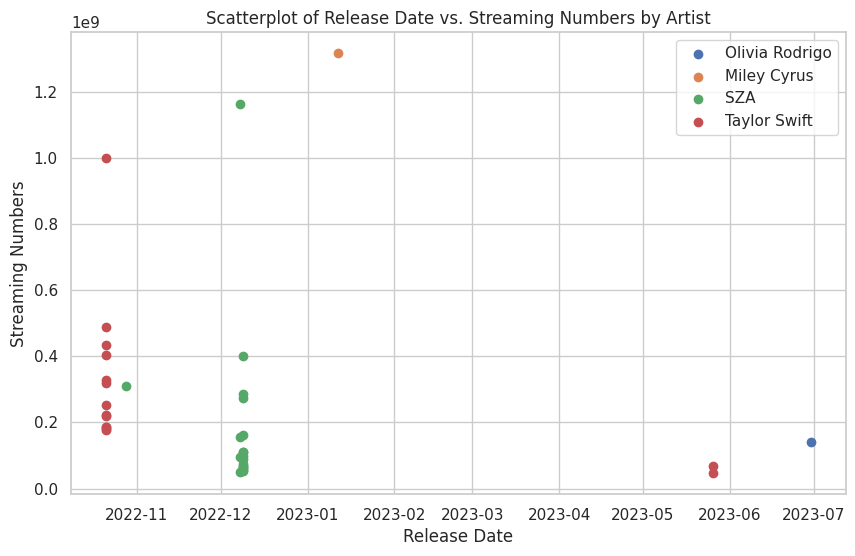

In [58]:
plt.figure(figsize=(10, 6))

artists = album_of_the_year_noms['artist_name'].unique()
for artist in artists:
    artist_data = album_of_the_year_noms[album_of_the_year_noms['artist_name'] == artist]
    plt.scatter(artist_data['release_date'], artist_data['streams'], label=artist)

plt.title('Scatterplot of Release Date vs. Streaming Numbers by Artist')
plt.xlabel('Release Date')
plt.ylabel('Streaming Numbers')
plt.legend()
plt.show()

It does not appear that when music was released affects streaming numbers. This can be seen with "Flowers", which leads in terms of streams but was released in the middle. In addition, "vampire" has more streams than latest "Midnights" songs but was released later.

What were the average attributes for the popular songs from each album?

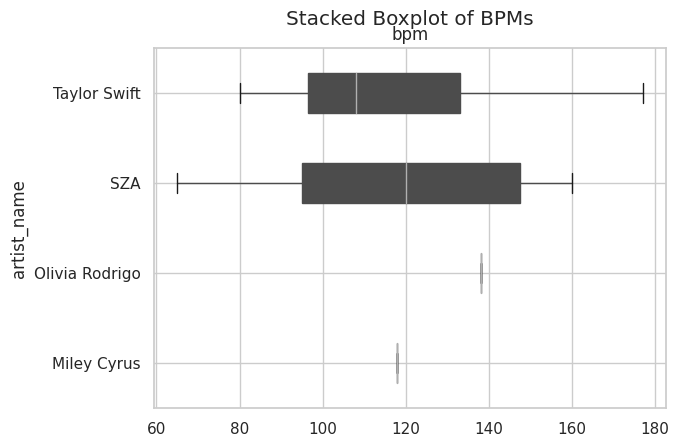

In [59]:
album_of_the_year_noms.boxplot(by='artist_name', column=['bpm'], vert=False, patch_artist=True)
plt.suptitle('Stacked Boxplot of BPMs')
plt.show()

<Figure size 1000x600 with 0 Axes>

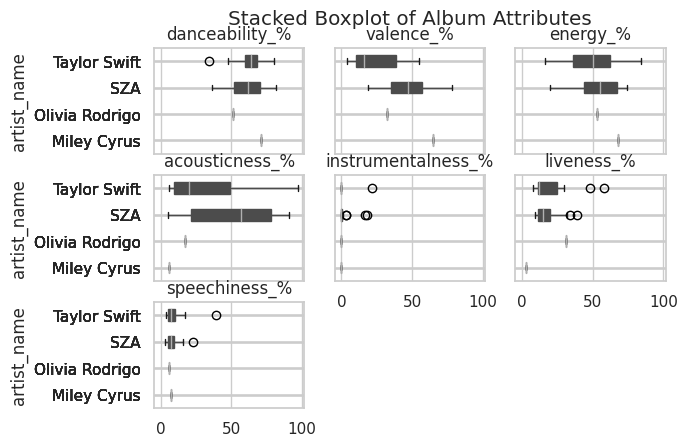

In [60]:
plt.figure(figsize=(10, 6))
plt.tight_layout()
album_of_the_year_noms.boxplot(by='artist_name', column=['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], vert=False, patch_artist=True)
plt.xlim(0, 100)
plt.suptitle('Stacked Boxplot of Album Attributes')
plt.show()

## Conclusion: Limitations & Next Steps

A Google Slides presentation of our findings can be found [here](https://docs.google.com/presentation/d/1xpw4xdOtFHYPvd6e3TejPyk2Y2nIEfoGyNm1Wo5xpPU/edit?usp=sharing).

**Limitations**

Although we cleaned the data, one of the biggest issues is missing data! This dataset is supposed to be a comprehensive list of the most famous songs of 2023 as listed on Spotify, but further exploration shows that this dataset was last updated in August 2023. This means that data from August-December is missing. One future improvement to this project would involve going and adding this data to our dataset so that we can get a full picture of the most famous songs of 2023.

Next, it's unclear which charts are being taken into account when we're talking about Spotify, Apple, Deezer, and Shazam charts. For example, Global and Top USA Charts relate to different audiences.

Finally, another limitation is spelling of artist names. This analysis wasn't affected by special character presence, but as we see below, there are some artist names with special characters in them that aren't supposed to be there.

In [61]:
grammys['artist_name'].unique()

array(['Latto', 'Jung Kook', 'Myke Towers', 'Olivia Rodrigo', 'Bad Bunny',
       'Dave', 'Central Cee', 'Eslabon Armado', 'Peso Pluma', 'Quevedo',
       'Gunna', 'Yng Lvcas', 'Grupo Frontera', 'NewJeans', 'Miley Cyrus',
       'David Kushner', 'SZA', 'Fifty Fifty', 'Billie Eilish', 'Feid',
       'Young Miko', 'Jimin', 'Gabito Ballesteros', 'Junior H',
       'Taylor Swift', 'Bizarrap', 'The Weeknd', 'Madonna',
       'Playboi Carti', 'Fuerza Regida', 'Tainy', 'Morgan Wallen',
       'Dua Lipa', 'Troye Sivan', '21 Savage', 'Metro Boomin', 'Karol G',
       'Shakira', 'Big One', 'Duki', 'Lit Killah', 'Maria Becerra', 'FMK',
       'Rusherking', 'Emilia', 'Tiago pzk', 'Yahritza Y Su Esencia',
       'Nicki Minaj', 'Aqua', 'Ice Spice', 'Ariana Grande',
       'Sky Rompiendo', 'David Guetta', 'Anne-Marie', 'Coi Leray',
       'Peggy Gou', 'Kali Uchis', 'dennis', 'MC Kevin o Chris',
       'PinkPantheress', 'Rauw Alejandro', 'ROSALï¿½', 'Ozuna',
       'Libianca', 'Post Malone', 'Yandel',

In [62]:
df_exploded['artist_name'].unique()

array(['Latto', 'Jung Kook', 'Myke Towers', 'Olivia Rodrigo',
       'Taylor Swift', 'Bad Bunny', 'Dave', 'Central Cee',
       'Eslabon Armado', 'Peso Pluma', 'Quevedo', 'Gunna', 'Yng Lvcas',
       'Grupo Frontera', 'NewJeans', 'Miley Cyrus', 'David Kushner',
       'Harry Styles', 'SZA', 'Fifty Fifty', 'Billie Eilish', 'Feid',
       'Young Miko', 'Jimin', 'Gabito Ballesteros', 'Junior H',
       'Arctic Monkeys', 'Bizarrap', 'The Weeknd', 'Madonna',
       'Playboi Carti', 'Fuerza Regida', 'Rema', 'Selena Gomez', 'Tainy',
       'Morgan Wallen', 'Dua Lipa', 'Troye Sivan', '21 Savage',
       'Metro Boomin', 'Karol G', 'Shakira', 'Big One', 'Duki',
       'Lit Killah', 'Maria Becerra', 'FMK', 'Rusherking', 'Emilia',
       'Tiago pzk', 'Yahritza Y Su Esencia', 'Post Malone', 'Swae Lee',
       'Bebe Rexha', 'David Guetta', 'Tyler', 'The Creator', 'Kali Uchis',
       'Nicki Minaj', 'Aqua', 'Ice Spice', 'OneRepublic', 'Daft Punk',
       'Ariana Grande', 'Sky Rompiendo', 'Anne-Marie'